# 301 - Arbeiten mit Physikalischen Größen

In [10]:
# Numpy und Matplotlib brauchen wir immer
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [87]:
def plot_data(xdata, ydata, xerr=None, yerr=None, ax=plt, **kwargs):
    # retrieve errors from data
    xdata, xerr = unp.nominal_values(xdata), unp.std_devs(xdata)
    if (xerr == 0).all():
        xerr = None
    ydata, yerr = unp.nominal_values(ydata), unp.std_devs(ydata)
    if (yerr == 0).all():
        yerr = None
    # default plot style
    if not ('ls' in kwargs or 'linestyle' in kwargs):
        kwargs['ls'] = 'none'
    if not 'marker' in kwargs:
        kwargs['marker'] = '.'
    # plot
    return ax.errorbar(xdata, ydata, xerr=xerr, yerr=yerr, **kwargs)

<Container object of 3 artists>

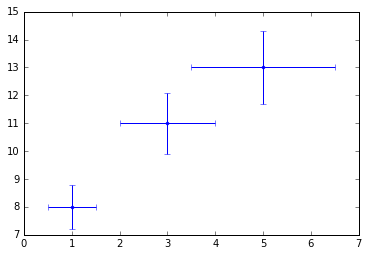

In [45]:
plot_data(x, y)

# Physikalische Einheiten

In [19]:
import pint
units = pint.UnitRegistry()
Q_ = units.Quantity
units.default_format = '~P' # Abgekürzte Einheiten-Namen

In [34]:
import uncertainties.unumpy as unp
t = Q_(unp.uarray([1,2,3], 2), units.seconds)
l = Q_(unp.uarray([1,2,3], 2), units.meters)
print(format(l/t, "~L"))

[1.0+/-2.8284271247461903 1.0+/-1.4142135623730951 1.0+/-0.9428090415820634] \frac{m}{s}


In [109]:
a = (10 * units.m/units.s).plus_minus(2)
print(a)
print("{:~L}".format(a))
print("{:Lx}".format(a))

(10.0 +/- 2.0) m/s
\left(10.0 \pm 2.0\right) \frac{m}{s}
\SI[separate-uncertainty=true]{10.0(2.0)}{\meter\per\second}


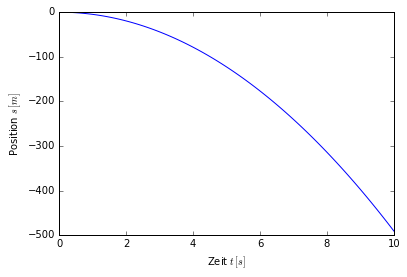

In [51]:
t = np.linspace(0, 10, 100) * units.seconds
a = -9.81 * units.meter / units.seconds**2
s = a / 2 * t**2
plt.plot(t, s)
plt.xlabel("Zeit $t \, [{:~L}]$".format(t.units))
plt.ylabel("Position $s \, [{:~L}]$".format(s.units))

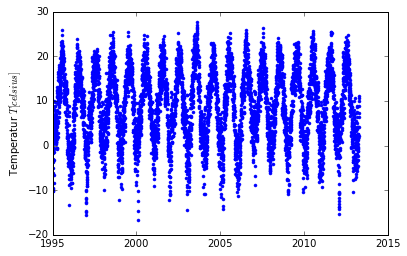

In [120]:
plot_data(date, T)
plt.ylabel('Temperatur $T [{:~L}]$'.format(T.units))

In [49]:
T_0 = Q_(23.5, units.degC)
print(T_0, T_0.to(units.K))

23.5 celsius 296.65 K


In [50]:
heating_rate = 0.5 * units.delta_degC / units.s
print(heating_rate, heating_rate.to(units.K / units.s))

0.5 Δcelsius/s 0.5 K/s


In [51]:
print(T_0 + 10 * units.minute * heating_rate)

323.5 celsius


In [52]:
u = x * units.s
v = y * units.m

In [53]:
def plot_labels(xdata, ydata):
    plt.xlabel("${:~P}$".format(xdata.units))
    plt.ylabel("${:~P}$".format(ydata.units))

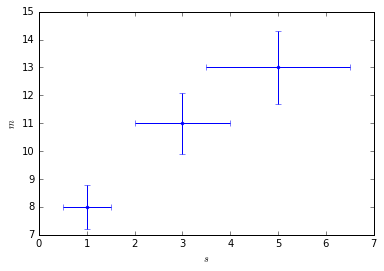

In [54]:
plot_data(u.magnitude, v.magnitude)
plot_labels(u, v)

## Tabellen

In [38]:
from tabulate import tabulate

In [42]:
print(tabulate([x, y]))

---------  ----------  ----------
1.0+/-0.5  3.0+/-1.0   5.0+/-1.5
8.0+/-0.8  11.0+/-1.1  13.0+/-1.3
---------  ----------  ----------
